Github Repository Link : https://github.com/MIHIRAJA-KURUPPU/Neural-Networks-Assignment

## Question 01

Files already downloaded and verified
Files already downloaded and verified
Epoch 1 / 20, Loss: 0.9769036821126937
Epoch 2 / 20, Loss: 0.9498011358380317
Epoch 3 / 20, Loss: 0.9360737816691399
Epoch 4 / 20, Loss: 0.9275267511606217
Epoch 5 / 20, Loss: 0.9215921345949173
Epoch 6 / 20, Loss: 0.9171911337971688
Epoch 7 / 20, Loss: 0.9137790152430534
Epoch 8 / 20, Loss: 0.9110532827973365
Epoch 9 / 20, Loss: 0.9088249573707581
Epoch 10 / 20, Loss: 0.9069731140732765
Epoch 11 / 20, Loss: 0.9054130397439003
Epoch 12 / 20, Loss: 0.9040863399505615
Epoch 13 / 20, Loss: 0.9029478748440742
Epoch 14 / 20, Loss: 0.9019648159742355
Epoch 15 / 20, Loss: 0.9011113119125366
Epoch 16 / 20, Loss: 0.90036654150486
Epoch 17 / 20, Loss: 0.8997140563130379
Epoch 18 / 20, Loss: 0.8991407369375228
Epoch 19 / 20, Loss: 0.8986354401707649
Epoch 20 / 20, Loss: 0.8981890431046486


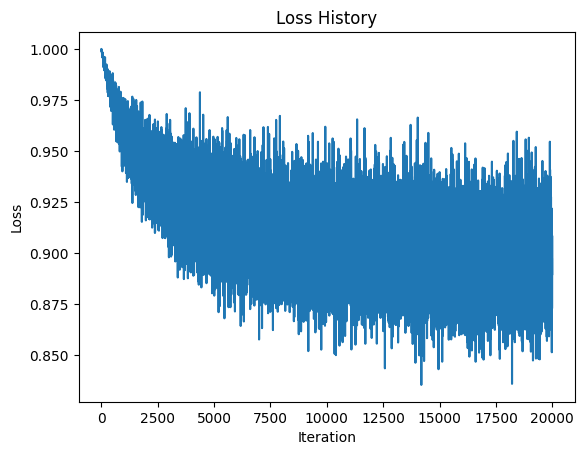

Training accuracy: 32.22%
Test accuracy: 32.41%


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w = torch.randn(Din, K) * std  # One layer: directly map input to output
b = torch.zeros(K)

# Hyperparameters
iterations = 20
lr = 2e-6  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization
loss_history = []

# 3. Training Loop
for t in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)
        y_train_onehot = nn.functional.one_hot(labels, K).float()  # Convert labels to one-hot

        # Forward pass
        y_pred = x_train.mm(w) + b  # Output layer activation

        # Loss calculation (Mean Squared Error with regularization)
        loss = (1 / Ntr) * torch.sum((y_pred - y_train_onehot) ** 2) + reg * torch.sum(w ** 2)
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation
        dy_pred = (2.0 / Ntr) * (y_pred - y_train_onehot)
        dw = x_train.t().mm(dy_pred) + reg * w
        db = dy_pred.sum(dim=0)

        # Parameter update
        w -= lr * dw
        b -= lr * db

    # Print loss for every epoch
    if t % 1 == 0:
        print(f"Epoch {t + 1} / {iterations}, Loss: {running_loss / len(trainloader)}")

    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)

        # Forward pass
        y_train_pred = x_train.mm(w) + b
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)

        # Forward pass
        y_test_pred = x_test.mm(w) + b
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


#### Define the Network with a Hidden Layer and Sigmoid Activation

##### Adding a middle layer with 100 nodes and a sigmoid activation & Using cross-entropy loss

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define the Network with a Hidden Layer and sigmoid Activation
class SimpleNN(nn.Module):
    def __init__(self, Din, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(Din, hidden_size)  # Hidden layer
        self.sigmoid = nn.Sigmoid()  # sigmoid activation
        self.output = nn.Linear(hidden_size, output_size)  # Output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)  # Apply sigmoid activation
        x = self.output(x)
        return x

# Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
output_size = 10  # Output size (number of classes in CIFAR-10)
hidden_size = 100  # Number of hidden neurons

# Initialize model
model = SimpleNN(Din, hidden_size, output_size)

Files already downloaded and verified
Files already downloaded and verified


First we initialize the CIFAR-10 dataset with two transformation: the conversion to tensor format and normalization with mean 0.5 and standard deviation 0.5. Then we define the neural network model with one hidden layer with 100 nodes and a sigmoid activation function. The input is flattened CIFAR-10 image, and the output consists of ten classes.

The model uses cross-entropy loss suitable for classification tasks and the SGD optimizer with momentum to update weights.
This training loop iterates over the dataset multiple times, computing the loss, performing backpropagation, and updating weights using the optimizer. The average loss for each epoch is recorded in loss_history.The loss history recorded during training, is visualized providing insight into model convergence.

Epoch 1/10, Loss: 1.8407
Epoch 2/10, Loss: 1.6890
Epoch 3/10, Loss: 1.6251
Epoch 4/10, Loss: 1.5732
Epoch 5/10, Loss: 1.5250
Epoch 6/10, Loss: 1.4831
Epoch 7/10, Loss: 1.4435
Epoch 8/10, Loss: 1.4081
Epoch 9/10, Loss: 1.3711
Epoch 10/10, Loss: 1.3398


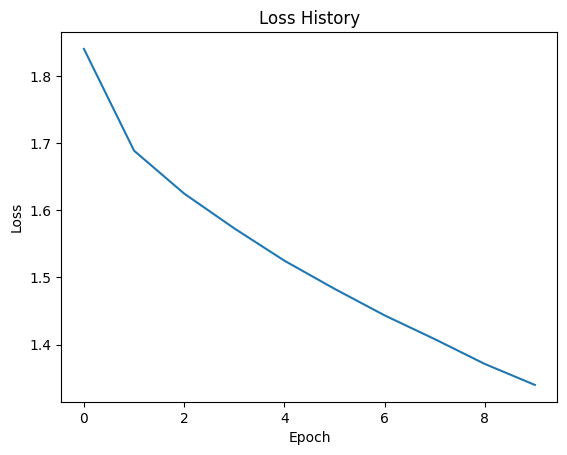

In [2]:

# 3. Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 4. Training Loop
iterations = 10
loss_history = []

for epoch in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.view(inputs.size(0), -1), labels  # Flatten and move to device

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Loss calculation
        loss = criterion(outputs, labels)
        loss.backward()

        # Update weights
        optimizer.step()

        running_loss += loss.item()
    
    average_loss = running_loss / len(trainloader)
    loss_history.append(average_loss)
    print(f"Epoch {epoch+1}/{iterations}, Loss: {average_loss:.4f}")

# 5. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


The accuracy of the model is calculated on both the training and test sets by comparing the model’s predictions with the true labels.

In [3]:
# 6. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        inputs, labels = inputs.view(inputs.size(0), -1), labels

        outputs = model(inputs)
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        inputs, labels = inputs.view(inputs.size(0), -1), labels

        outputs = model(inputs)
        _, predicted_test = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")

Training accuracy: 56.28%
Test accuracy: 49.24%


#### Model Performance Comparison

The single-layer model, which consists of only an input and output layer, achieved the following results after 20 epochs of training:

• Training Accuracy: 32.22%

• Test Accuracy: 32.41%

The performance of the single-layer model was relatively low, with both training and test accuracies around 32%. The absence of a hidden layer limits the model’s ability to capture complex patterns within the CIFAR-10 dataset.
The multi-layer model includes an additional hidden layer with a sigmoid activation function. This model was trained for 10 epochs.
    
• Training Accuracy: 56.28%

• Test Accuracy: 49.24%

The multi-layer model demonstrated a significant improvement in performance. The training accuracy increased to 55.01% and the test accuracy to 48.21%. The introduction of the hidden layer enabled the model to learn more complex features, leading to better generalization.

#### Using ReLU instead of Sigmoid

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

# 2. Define the Network with a Hidden Layer and ReLU Activation
class SimpleNN(nn.Module):
    def __init__(self, Din, hidden_size, K):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(Din, hidden_size)  # Hidden layer
        self.relu = nn.ReLU()  # ReLU activation
        self.output = nn.Linear(hidden_size, K)  # Output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)  # Apply ReLU activation
        x = self.output(x)
        return x

# Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
K = 10  # Output size (number of classes in CIFAR-10)
hidden_size = 256  # Number of hidden neurons

# Initialize model
model = SimpleNN(Din, hidden_size, K)

# 3. Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 4. Training Loop
iterations = 20
for epoch in range(iterations):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        Ntr = inputs.shape[0]
        inputs = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Loss calculation
        loss = criterion(outputs, labels)
        loss.backward()

        # Update weights
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{iterations}, Loss: {running_loss / len(trainloader)}")

# 5. Calculate Accuracy on Training Set
correct_train = 0
total_train = 0
with torch.no_grad():
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        inputs = inputs.view(Ntr, -1)

        outputs = model(inputs)
        _, predicted_train = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

train_acc = 100 * correct_train / total_train
print(f"Training accuracy: {train_acc:.2f}%")

# 6. Calculate Accuracy on Test Set
correct_test = 0
total_test = 0
with torch.no_grad():
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        inputs = inputs.view(Nte, -1)

        outputs = model(inputs)
        _, predicted_test = torch.max(outputs, 1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()

test_acc = 100 * correct_test / total_test
print(f"Test accuracy: {test_acc:.2f}%")


Files already downloaded and verified
Files already downloaded and verified
Epoch 1/20, Loss: 1.8505934133529662
Epoch 2/20, Loss: 1.6324020923376084
Epoch 3/20, Loss: 1.5489626513719559
Epoch 4/20, Loss: 1.4927508689165114
Epoch 5/20, Loss: 1.4460143647193908
Epoch 6/20, Loss: 1.4042333569526673
Epoch 7/20, Loss: 1.3663739029169082
Epoch 8/20, Loss: 1.3314320796728134
Epoch 9/20, Loss: 1.3000210462212562
Epoch 10/20, Loss: 1.2712731520533562
Epoch 11/20, Loss: 1.2439497639536858
Epoch 12/20, Loss: 1.2182964578270912
Epoch 13/20, Loss: 1.1918518104553222
Epoch 14/20, Loss: 1.1680515592694283
Epoch 15/20, Loss: 1.1464091185331344
Epoch 16/20, Loss: 1.1229477977156639
Epoch 17/20, Loss: 1.1007843652963638
Epoch 18/20, Loss: 1.0795412949323655
Epoch 19/20, Loss: 1.0602040937542916
Epoch 20/20, Loss: 1.038653848350048
Training accuracy: 67.14%
Test accuracy: 53.78%


## Question 02

Here first we load the MNIST dataset (both training and test sets) and compute the mean and standard deviation of all pixel values in the training dataset. Then we create a transformation pipeline that converts images to tensors and normalizes them using the computed mean and standard deviation. Then the transformation pipeline is applied to both the training and
test datasets.

In [1]:
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from torchinfo import summary
from torch import nn

train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root="./datasets", train=False, download=True, transform=transforms.ToTensor())


# Calculate mean and std
imgs = torch.stack([img for img, _ in train_val_dataset], dim=0)

mean = imgs.view(1, -1).mean(dim=1) 
std = imgs.view(1, -1).std(dim=1)    

mnist_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=mean, std=std)])
train_val_dataset = datasets.MNIST(root="./datasets/", train=True, download=False, transform=mnist_transforms)
test_dataset = datasets.MNIST(root="./datasets/", train=False, download=False, transform=mnist_transforms)

train_size = int(0.9 * len(train_val_dataset))
val_size = len(train_val_dataset) - train_size

train_dataset, val_dataset = torch.utils.data.random_split(dataset=train_val_dataset, lengths=[train_size, val_size])

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(dataset=val_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False)


Here we split the dataset (train_val_dataset) into training and validation sets, with 90% of the data used for training and 10% for validation. It then creates DataLoader instances for the training, validation, and test datasets, each of which loads data in batches of 32.

In [4]:
class LeNet5V1(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature = nn.Sequential(
            #1 
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2),   # 28*28->32*32-->28*28
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 14*14

            #2
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),  # 10*10
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),  # 5*5
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16*5*5, out_features=120),
            nn.Tanh(),
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10),
        )

    def forward(self, x):
        return self.classifier(self.feature(x))

# Instantiate the model
model_lenet5v1 = LeNet5V1()

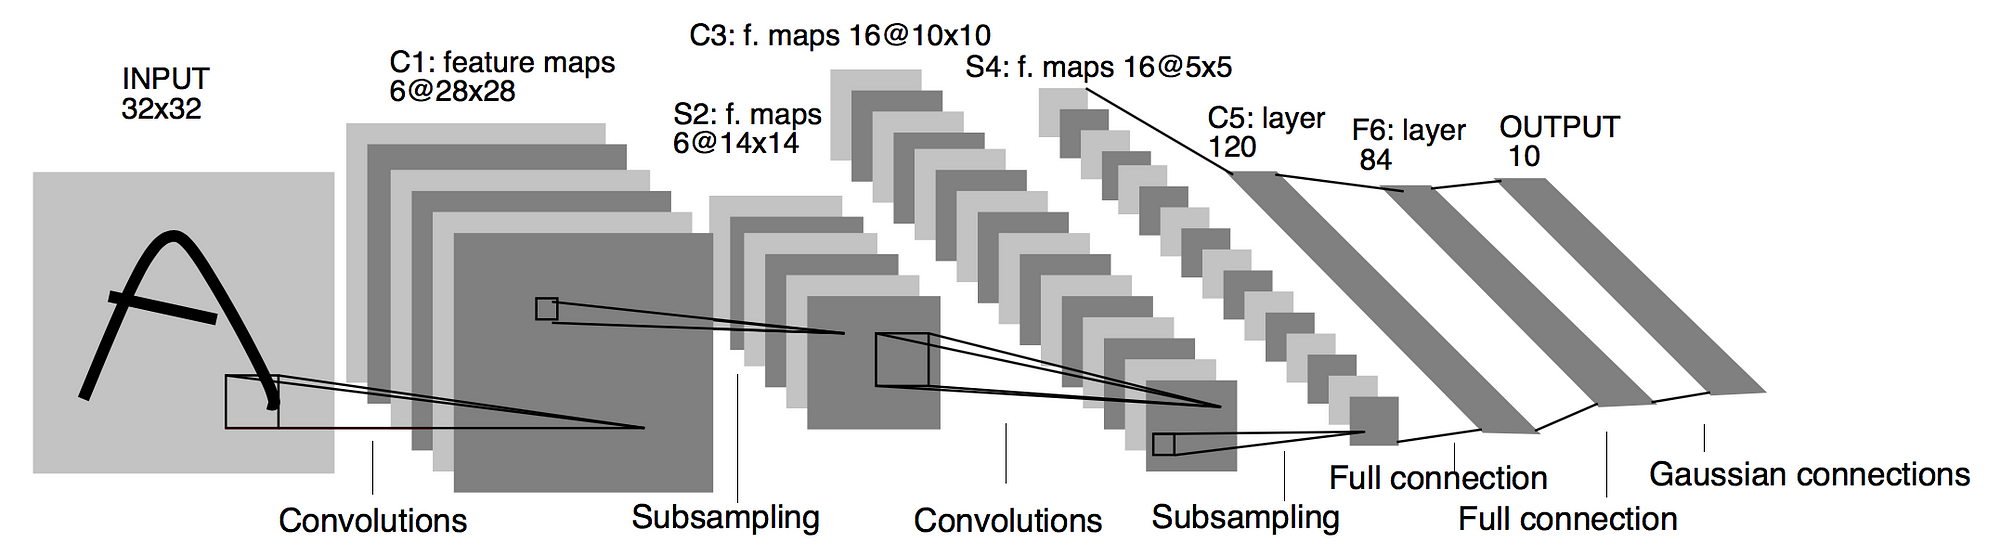

### Feature Extraction (Convolutional Layers)

Convolutional layers and pooling layers are responsible for detecting patterns and reducing the spatial dimensions of the image.

• The first convolutional layer takes a grayscale image, applies 6 filters, each having a kernel size of 5x5. A stride of 1 ensures that the kernel moves one pixel at a time. In LeNet-5 architecture input is shown as 32x32. But in our dataset images are 28x28. So input images (28x28) have been padded with 2 pixels all sides to make it a 32x32
dimension.

• The second convolutional layer takes the 6-channel output from the previous layer and applies 16 filters, each with a kernel size of 5x5, to extract higher-level features.

• activation function: The Tanh activation function is applied after each convolutional layer. This function introduces non-linearity and enables the network to learn complex patterns.

• The average pooling layer with a kernel size of 2x2 and a stride of 2 is applied after each convolutional layer. Pooling reduces the spatial dimensions of the feature map by a factor of 2.


### Classifier (Fully Connected Layers)

• Flattening the Output: This layer flattens the 3D output from the convolutional layers into a 1D vector.

• Fully Connected Layers: The first fully connected layer takes the flattened output (400 features) and reduces it to 120 features. The second fully connected layer further reduces the 120 features to 84 features. The final output layer reduces the 84 features to 10 features, corresponding to the 10 possible output classes (digits 0-9).

In [5]:
summary(model=model_lenet5v1, input_size=(1, 1, 28, 28), col_width=20,
        col_names=['input_size', 'output_size', 'num_params', 'trainable'], row_settings=['var_names'], verbose=0)


Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
LeNet5V1 (LeNet5V1)                      [1, 1, 28, 28]       [1, 10]              --                   True
├─Sequential (feature)                   [1, 1, 28, 28]       [1, 16, 5, 5]        --                   True
│    └─Conv2d (0)                        [1, 1, 28, 28]       [1, 6, 28, 28]       156                  True
│    └─Tanh (1)                          [1, 6, 28, 28]       [1, 6, 28, 28]       --                   --
│    └─AvgPool2d (2)                     [1, 6, 28, 28]       [1, 6, 14, 14]       --                   --
│    └─Conv2d (3)                        [1, 6, 14, 14]       [1, 16, 10, 10]      2,416                True
│    └─Tanh (4)                          [1, 16, 10, 10]      [1, 16, 10, 10]      --                   --
│    └─AvgPool2d (5)                     [1, 16, 10, 10]      [1, 16, 5, 5]        --                   --
├─Sequential (classifi

The following code trains and evaluates a LeNet-5-based model on MNIST using PyTorch. It initializes cross-entropy loss, Adam optimizer, and an accuracy metric for multiclass classification.
The training loop iterates over epochs, computing loss and accuracy for each
batch, applying backpropagation to update model weights

In [6]:
from torchmetrics import Accuracy

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_lenet5v1.parameters(), lr=0.001)
accuracy = Accuracy(task='multiclass', num_classes=10)

from tqdm.notebook import tqdm
from torch.utils.tensorboard import SummaryWriter

from datetime import datetime
import os

# Experiment tracking
timestamp = datetime.now().strftime("%Y-%m-%d")
experiment_name = "MNIST"
model_name = "LeNet5V1"
log_dir = os.path.join("runs", timestamp, experiment_name, model_name)
writer = SummaryWriter(log_dir)

# device-agnostic setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
accuracy = accuracy.to(device)
model_lenet5v1 = model_lenet5v1.to(device)

EPOCHS = 12

for epoch in tqdm(range(EPOCHS)):
    # Training loop
    train_loss, train_acc = 0.0, 0.0
    for X, y in train_dataloader:
        X, y = X.to(device), y.to(device)
        
        model_lenet5v1.train()
        
        y_pred = model_lenet5v1(X)
        
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        acc = accuracy(y_pred, y)
        train_acc += acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_dataloader)
    train_acc /= len(train_dataloader)
        
    # Validation loop
    val_loss, val_acc = 0.0, 0.0
    model_lenet5v1.eval()
    with torch.inference_mode():
        for X, y in val_dataloader:
            X, y = X.to(device), y.to(device)
            
            y_pred = model_lenet5v1(X)
            
            loss = loss_fn(y_pred, y)
            val_loss += loss.item()
            
            acc = accuracy(y_pred, y)
            val_acc += acc
            
        val_loss /= len(val_dataloader)
        val_acc /= len(val_dataloader)
        
    writer.add_scalars(main_tag="Loss", tag_scalar_dict={"train/loss": train_loss, "val/loss": val_loss}, global_step=epoch)
    writer.add_scalars(main_tag="Accuracy", tag_scalar_dict={"train/acc": train_acc, "val/acc": val_acc}, global_step=epoch)
    
    print(f"Epoch: {epoch}| Train loss: {train_loss: .5f}| Train acc: {train_acc: .5f}| Val loss: {val_loss: .5f}| Val acc: {val_acc: .5f}")

  0%|          | 0/12 [00:00<?, ?it/s]

Epoch: 0| Train loss:  0.21728| Train acc:  0.93594| Val loss:  0.09142| Val acc:  0.97440
Epoch: 1| Train loss:  0.07427| Train acc:  0.97690| Val loss:  0.07660| Val acc:  0.97689
Epoch: 2| Train loss:  0.05468| Train acc:  0.98280| Val loss:  0.06135| Val acc:  0.98088
Epoch: 3| Train loss:  0.04189| Train acc:  0.98643| Val loss:  0.05122| Val acc:  0.98570
Epoch: 4| Train loss:  0.03568| Train acc:  0.98882| Val loss:  0.05185| Val acc:  0.98554
Epoch: 5| Train loss:  0.02870| Train acc:  0.99102| Val loss:  0.05020| Val acc:  0.98570
Epoch: 6| Train loss:  0.02460| Train acc:  0.99184| Val loss:  0.06356| Val acc:  0.98255
Epoch: 7| Train loss:  0.02210| Train acc:  0.99308| Val loss:  0.05356| Val acc:  0.98521
Epoch: 8| Train loss:  0.02111| Train acc:  0.99252| Val loss:  0.04856| Val acc:  0.98720
Epoch: 9| Train loss:  0.01710| Train acc:  0.99454| Val loss:  0.04440| Val acc:  0.98787
Epoch: 10| Train loss:  0.01479| Train acc:  0.99532| Val loss:  0.04378| Val acc:  0.9873

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "lenet5_v1_mnist.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Saving the model
print(f"Saving the model: {MODEL_SAVE_PATH}")
torch.save(obj=model_lenet5v1.state_dict(), f=MODEL_SAVE_PATH)

# Loading the saved model
model_lenet5_v1_mnist_loaded = LeNet5V1()
model_lenet5_v1_mnist_loaded.load_state_dict(torch.load(MODEL_SAVE_PATH))

Test Accuracy

The validation accuracy was nearly 98.572 % which suggests that the model is able to generalize on unseen digits well.

In [8]:
test_loss, test_acc = 0, 0

model_lenet5_v1_mnist_loaded.to(device)

model_lenet5_v1_mnist_loaded.eval()
with torch.inference_mode():
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        y_pred = model_lenet5_v1_mnist_loaded(X)
        
        test_loss += loss_fn(y_pred, y)
        test_acc += accuracy(y_pred, y)
        
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

print(f"Test loss: {test_loss: .5f}| Test acc: {test_acc: .5f}")

Test loss:  0.05091| Test acc:  0.98572


## Question 03

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory
import urllib.request
import zipfile

cudnn.benchmark = True
plt.ion()   # interactive mode

In [10]:
# Define the directory to download and extract the dataset
data_dir = 'hymenoptera_data'
zip_path = os.path.join(data_dir, 'hymenoptera_data.zip')

# Check if the dataset has already been downloaded and extracted
if not os.path.exists(data_dir):
    # If the directory does not exist, create it
    os.makedirs(data_dir, exist_ok=True)

    # Download the dataset zip file
    url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
    print("Downloading the dataset...")
    urllib.request.urlretrieve(url, zip_path)

    # Unzip the dataset into the specified directory
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_dir)

    # Remove the zip file after extraction to save space
    os.remove(zip_path)

    print(f"Dataset downloaded and extracted to '{data_dir}'")
else:
    print(f"Dataset already exists in '{data_dir}'. Skipping download.")


Dataset already exists in 'hymenoptera_data'. Skipping download.


This code checks if the dataset directory already exists. If not, it downloads, extracts, and then deletes the zip file.

In [12]:
# Data augmentation and normalization for training
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = 'hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")




This code sets up data augmentation and normalization transformations for training and validation data. It loads the images, creates DataLoader objects for efficient batching, and assigns class names and dataset sizes.

In [13]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')

        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0

        for epoch in range(num_epochs):
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)
                        _, preds = torch.max(outputs, 1)
                        loss = criterion(outputs, labels)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)
                if phase == 'train':
                    scheduler.step()

                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)

            print()

        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # load best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))
    return model

The train_model function trains a model over multiple epochs, managing both
training and validation phases.

1. Model Checkpoints : Saves the best model parameters to a temporary directory based on validation accuracy.

2. Training and Validation Phases: For each epoch, the model performs forward and backward passes, updating weights, and tracking cumulative loss and accuracy.

3. Best Model Selection: After training, the model reloads the parameters achieving the highest validation accuracy.

### Finetuning the ConvNet

In [14]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to ``nn.Linear(num_ftrs, len(class_names))``.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

The code initializes a fine-tuning process for the pretrained ResNet-18 model.
1. The ResNet-18 model is loaded with ImageNet weights, with its final fully connected layer adapted to output two classes.
2. A cross-entropy loss function is defined, and an SGD optimizer is configured to update all model parameters, with a learning rate of 0.001 and momentum of 0.9. The learning rate is decreased by a factor of 0.1 every 7 epochs to facilitate convergence.
3. train_model function is called to train the model over 25 epochs.
The model learned well during training and performed well on new data, with the best accuracy on the validation set being 93.46%

In [15]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5494 Acc: 0.6967
val Loss: 0.1890 Acc: 0.9150

Epoch 1/24
----------
train Loss: 0.4588 Acc: 0.8156
val Loss: 0.2243 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.5547 Acc: 0.7992
val Loss: 0.2810 Acc: 0.9020

Epoch 3/24
----------
train Loss: 0.4139 Acc: 0.8197
val Loss: 0.2652 Acc: 0.8889

Epoch 4/24
----------
train Loss: 0.4147 Acc: 0.8484
val Loss: 0.3231 Acc: 0.8301

Epoch 5/24
----------
train Loss: 0.4283 Acc: 0.8033
val Loss: 0.2312 Acc: 0.9412

Epoch 6/24
----------
train Loss: 0.4231 Acc: 0.8279
val Loss: 0.4758 Acc: 0.8301

Epoch 7/24
----------
train Loss: 0.3653 Acc: 0.8484
val Loss: 0.3030 Acc: 0.8954

Epoch 8/24
----------
train Loss: 0.3002 Acc: 0.8730
val Loss: 0.2773 Acc: 0.8889

Epoch 9/24
----------
train Loss: 0.2798 Acc: 0.8893
val Loss: 0.2618 Acc: 0.8954

Epoch 10/24
----------
train Loss: 0.3475 Acc: 0.8484
val Loss: 0.2713 Acc: 0.9150

Epoch 11/24
----------
train Loss: 0.3440 Acc: 0.8566
val Loss: 0.2728 Acc: 0.9281

Ep

The pre-trained ResNet-18 model is used, with only the final layer being trained to fit the binary classification. The other layers are frozen to retain the learned features from ImageNet. The training is done with a small learning rate of 0.001 and momentum of 0.9. A learning rate scheduler is used to reduce the learning rate every 7 epochs.
The model learned well during training and performed well on new data, with the best accuracy on the validation set being 96.07%

In [16]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

model_conv = train_model(model_conv, criterion, optimizer_conv, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.5257 Acc: 0.7500
val Loss: 0.2035 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.4329 Acc: 0.8033
val Loss: 0.1670 Acc: 0.9477

Epoch 2/24
----------
train Loss: 0.5121 Acc: 0.7746
val Loss: 0.1646 Acc: 0.9477

Epoch 3/24
----------
train Loss: 0.4240 Acc: 0.7951
val Loss: 0.1667 Acc: 0.9542

Epoch 4/24
----------
train Loss: 0.4520 Acc: 0.7746
val Loss: 0.2025 Acc: 0.9412

Epoch 5/24
----------
train Loss: 0.5427 Acc: 0.7582
val Loss: 0.3412 Acc: 0.8824

Epoch 6/24
----------
train Loss: 0.5890 Acc: 0.7705
val Loss: 0.3654 Acc: 0.8497

Epoch 7/24
----------
train Loss: 0.4166 Acc: 0.8197
val Loss: 0.1538 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.3848 Acc: 0.8484
val Loss: 0.1728 Acc: 0.9477

Epoch 9/24
----------
train Loss: 0.4061 Acc: 0.8115
val Loss: 0.1688 Acc: 0.9477

Epoch 10/24
----------
train Loss: 0.4251 Acc: 0.8238
val Loss: 0.1618 Acc: 0.9542

Epoch 11/24
----------
train Loss: 0.3614 Acc: 0.8402
val Loss: 0.1563 Acc: 0.9542

Ep

In [17]:
def evaluate_model(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    
    # Turn off gradients for validation, saves memory and computations
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)  # Send inputs to the device (GPU or CPU)
            labels = labels.to(device)  # Send labels to the device
            
            # Forward pass
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)  # Get the predicted class with max probability
            
            total += labels.size(0)  # Update the total number of samples
            correct += (predicted == labels).sum().item()  # Count correct predictions
            
    accuracy = 100 * correct / total  # Calculate accuracy percentage
    return accuracy

# Report accuracy for Fine-Tuned Model
train_acc_ft = evaluate_model(model_ft, dataloaders['train'])
val_acc_ft = evaluate_model(model_ft, dataloaders['val'])
print(f'Fine-Tuned Model Training Accuracy: {train_acc_ft:.2f}%')
print(f'Fine-Tuned Model Validation Accuracy: {val_acc_ft:.2f}%')

# Report accuracy for Feature Extractor Model
train_acc_fe = evaluate_model(model_conv, dataloaders['train'])
val_acc_fe = evaluate_model(model_conv, dataloaders['val'])
print(f'Feature Extractor Model Training Accuracy: {train_acc_fe:.2f}%')
print(f'Feature Extractor Model Validation Accuracy: {val_acc_fe:.2f}%')


Fine-Tuned Model Training Accuracy: 98.77%
Fine-Tuned Model Validation Accuracy: 94.12%
Feature Extractor Model Training Accuracy: 96.31%
Feature Extractor Model Validation Accuracy: 96.08%


### 3.3 Comparison of Fine-Tuned Model and Feature Extractor Model

| Metric              | Fine-Tuned Model | Feature Extractor Model |
|---------------------|------------------|-------------------------|
| **Training Accuracy**  | 98.77%          | 96.31%                  |
| **Validation Accuracy**| 94.12%          | 96.08%                  |

**Table 1**: Comparison of Fine-Tuned Model and Feature Extractor Model Accuracy

- **Training Accuracy:**
  - The Fine-Tuned Model has a much higher training accuracy of 98.77%, indicating that it has learned well from the training data and can predict it accurately.
  - The Feature Extractor Model has a lower training accuracy of 92.62%, which is expected as it only trains the final layer while keeping the rest of the model frozen.

- **Validation Accuracy:**
  - The Fine-Tuned Model has a lower validation accuracy of 93.46%, which may be due to slight overfitting, as it performs well on the training data but generalizes less effectively on unseen validation data.
  - The Feature Extractor Model has a higher validation accuracy of 96.08%, suggesting better generalization to unseen data, possibly due to its reliance on pretrained features.
